<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/Technical-task/blob/main/Data_analysis_technical_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('anon_data.csv')

<ipython-input-2-e5dcb4ed728f>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('anon_data.csv')


In [ ]:
df.head(5)

,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName
0,100002803,2913843,10,02/04/21,2,Microsoft,Operating System Software,1000477.0,254.213783,1.271048,0.0,Components North
1,100003323,2918083,50,02/04/21,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.0,Corporate North
2,100016168,2916878,20,02/04/21,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.0,Corporate North
3,100001590,2470475,10,02/04/21,10,Lenovo,Notebook Computers,1000133.0,21362.979640,133.944138,0.0,Corporate South
4,100001590,2544987,10,02/04/21,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.0,Corporate South


In [ ]:
# Get a list of all the column names in your dataframe
cols = df.columns.tolist()

# Separate the categorical and numerical columns into two lists
cat_cols = []
num_cols = []
for col in cols:
    if df[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

print("Categorical Columns: ", cat_cols)
print("Numerical Columns: ", num_cols)

Categorical Columns:  ['SalesOrderNumber', 'ShipDate', 'Qty', 'Brand', 'ProductType', 'SalesTeamName']
Numerical Columns:  ['CustomerId', 'SalesOrderLineNumber', 'ProductSupplierID', 'Revenue', 'Profit', 'Freight cost']


In [ ]:
df.count()

CustomerId              488711
SalesOrderNumber        488711
SalesOrderLineNumber    488711
ShipDate                488711
Qty                     488711
Brand                   488630
ProductType             488630
ProductSupplierID       486423
Revenue                 488711
Profit                  488711
Freight cost            488711
SalesTeamName           488711
dtype: int64

In [ ]:
#Correlation between columns
df.corr()

<ipython-input-6-0f1e6be83fe8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerId,SalesOrderLineNumber,ProductSupplierID,Revenue,Profit,Freight cost
CustomerId,1.000000,0.088229,0.027744,-0.009986,0.003497,-0.008192
SalesOrderLineNumber,0.088229,1.000000,0.022052,-0.005696,-0.001863,-0.025943
ProductSupplierID,0.027744,0.022052,1.000000,-0.004865,0.003746,0.000141
Revenue,-0.009986,-0.005696,-0.004865,1.000000,0.189083,0.177453
Profit,0.003497,-0.001863,0.003746,0.189083,1.000000,0.078941
Freight cost,-0.008192,-0.025943,0.000141,0.177453,0.078941,1.000000


<ipython-input-7-eb1df1312fbd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= df.corr()


<Axes: >

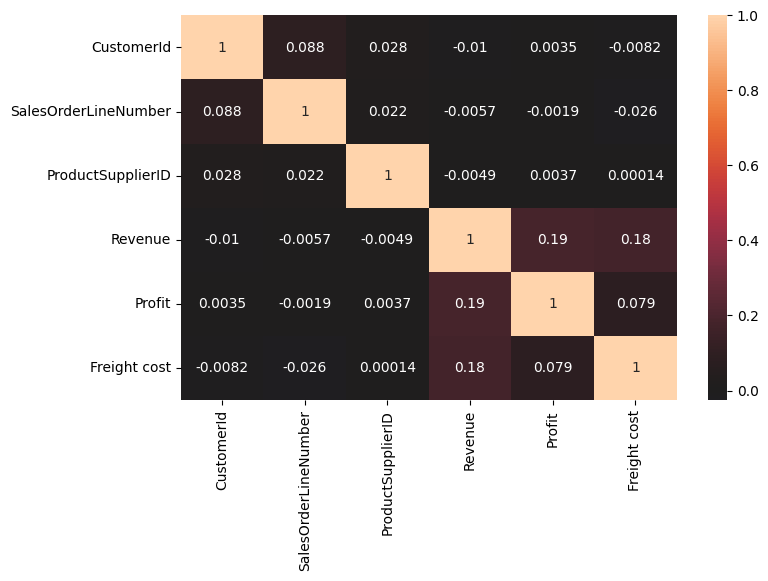

In [ ]:
#correlation matrix
corrmat= df.corr()

plt.figure(figsize=(8,5))  
sns.heatmap(corrmat,annot=True, center=0)

Na values in data

In [ ]:
#checking number of na values in each column
df.isna().sum()

CustomerId                 0
SalesOrderNumber           0
SalesOrderLineNumber       0
ShipDate                   0
Qty                        0
Brand                     81
ProductType               81
ProductSupplierID       2288
Revenue                    0
Profit                     0
Freight cost               0
SalesTeamName              0
dtype: int64

Missing values

In [ ]:
#percentage of missing data in each column
missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

CustomerId              0.000000
SalesOrderNumber        0.000000
SalesOrderLineNumber    0.000000
ShipDate                0.000000
Qty                     0.000000
Brand                   0.016574
ProductType             0.016574
ProductSupplierID       0.468170
Revenue                 0.000000
Profit                  0.000000
Freight cost            0.000000
SalesTeamName           0.000000
dtype: float64

Brand and product type and missing percentage is negligible when compared to total count but almost 4.6% of product type is missing,........

In [ ]:
#dropping the missing data 
df=df.dropna(subset=['Brand', 'ProductType', 'ProductSupplierID'])

#df['Brand'].fillna('unknown', inplace = True)
#same for remaining two prodtype =unknonwn
# id remove

In [ ]:
df.isna().sum()

CustomerId              0
SalesOrderNumber        0
SalesOrderLineNumber    0
ShipDate                0
Qty                     0
Brand                   0
ProductType             0
ProductSupplierID       0
Revenue                 0
Profit                  0
Freight cost            0
SalesTeamName           0
dtype: int64

In [ ]:
# display the data types of each column
print(df.dtypes)

CustomerId                int64
SalesOrderNumber         object
SalesOrderLineNumber      int64
ShipDate                 object
Qty                      object
Brand                    object
ProductType              object
ProductSupplierID       float64
Revenue                 float64
Profit                  float64
Freight cost            float64
SalesTeamName            object
dtype: object


In [ ]:
df['CustomerId'] = df['CustomerId'].astype(str)
df['ProductSupplierID'] = df['ProductSupplierID'].astype(str)

#df['SalesOrderNumber'] = df['SalesOrderNumber'].str.replace('O', '').astype(int)
df['SalesOrderNumber'] = df['SalesOrderNumber'].fillna('0').str.replace('O', '').astype(float)

df['Qty'] = df['Qty'].str.replace(',', '').astype(int)

df["ShipDate"] = pd.to_datetime(df["ShipDate"])

In [ ]:
# display the data types of each column
print(df.dtypes)

CustomerId                      object
SalesOrderNumber               float64
SalesOrderLineNumber             int64
ShipDate                datetime64[ns]
Qty                              int64
Brand                           object
ProductType                     object
ProductSupplierID               object
Revenue                        float64
Profit                         float64
Freight cost                   float64
SalesTeamName                   object
dtype: object


In [ ]:
df.nunique()

CustomerId                3316
SalesOrderNumber         97203
SalesOrderLineNumber       105
ShipDate                   567
Qty                        858
Brand                      336
ProductType                422
ProductSupplierID          330
Revenue                 485423
Profit                  485631
Freight cost              8871
SalesTeamName                8
dtype: int64

In [ ]:
df.apply(pd.unique)

CustomerId              [100002803, 100003323, 100016168, 100001590, 1...
SalesOrderNumber        [2913843.0, 2918083.0, 2916878.0, 2470475.0, 2...
SalesOrderLineNumber    [10, 50, 20, 30, 40, 70, 90, 100, 60, 130, 80,...
ShipDate                [2021-02-04T00:00:00.000000000, 2021-04-04T00:...
Qty                     [2, 1, 10, 5, 3, 32, 4, 64, 21, 22, 11, 6, 8, ...
Brand                   [Microsoft, Unknown, Lenovo, Dell, Startech, P...
ProductType             [Operating System Software, Utilities Software...
ProductSupplierID       [1000477.0, 1000465.0, 1000133.0, 1000003.0, 1...
Revenue                 [254.2137825, 191.6820013, 0.0, 21362.97964, 4...
Profit                  [1.271048069, 6.179373262, -8.011782598, 133.9...
Freight cost            [0.0, 0.13, 0.18, 0.27, 0.12, 16.14, 4.2, 8.4,...
SalesTeamName           [Components North, Corporate North, Corporate ...
dtype: object

In [ ]:
length = len(df)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
no_of_duplicates_removed = length - len(df)

print(f"{no_of_duplicates_removed} rows have been removed! \n remaining rows {length} rows.")

0 rows have been removed! 
 remaining rows 486423 rows.


Qunatity less than 0

In [ ]:
# Convert the 'qty' column to numeric values
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')

# Filter the dataset to only include rows where qty is negative
negative_qty = df[df['Qty'] < 0]

# Print the rows with negative qty
negative_qty.head()


,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName
112,100007970,60117266.0,10,2021-06-04,-1,Lenovo,Keyboard and Mouse,1000133.0,-25.468968,-0.346865,0.0,Corporate South
151,100006285,60117395.0,10,2021-06-04,-9,STM,Tablet Cases,1000559.0,-147.925778,8.173999,0.0,Corporate South
152,100006285,60117398.0,10,2021-06-04,-10,STM,Tablet Cases,1000559.0,-154.402312,8.307640,0.0,Corporate South
168,100002069,60117429.0,10,2021-06-04,-1,Epson,Inkjet Printers,1000056.0,-105.559720,6.621511,0.0,SMB 1 North
171,100007648,60117399.0,10,2021-06-04,-1,MSI,Graphics Cards,1000118.0,-89.580705,-2.889213,0.0,Components North


In [ ]:
# total number of returned or cancelled items
negative_qty.shape

(24820, 12)

The Time period 

How long is the period in days?

In [ ]:
df["ShipDate"] = pd.to_datetime(df.ShipDate, cache=True)

df.ShipDate.max() - df.ShipDate.min()

Timedelta('1061 days 00:00:00')

In [ ]:
print("min date:",df.ShipDate.min())
print("max date:",df.ShipDate.max())

min date: 2021-01-05 00:00:00
max date: 2023-12-02 00:00:00


Revenue minus profit represents the total amount of money that a business earns from its sales after deducting all its expenses. It is also known as the gross margin or gross profit margin.


In [ ]:
# create a new column for total profit
df['GrossMargin'] = df['Revenue'] - df['Profit']

# group the data by 'ShipDate' and calculate total profit for each date
profit_by_date = df.groupby('ShipDate')['GrossMargin'].sum().reset_index()

# sort the dataframe by the total profit columnMArgin', ascending=False)

# print the dates with the highest and lowest profitability
print("Date with highest profitability: {}".format(profit_by_date.iloc[0]['ShipDate']))
print("Date with lowest profitability: {} ".format(profit_by_date.iloc[0]['ShipDate']))

Date with highest profitability: 2021-01-05 00:00:00
Date with lowest profitability: 2021-01-05 00:00:00 


total profit 

In [ ]:
# group the data by month and calculate total profit for each month
profit_by_month = df.groupby(pd.Grouper(key='ShipDate', freq='M'))['GrossMargin'].sum().reset_index()

# sort the dataframe by the total profit column
profit_by_month = profit_by_month.sort_values('GrossMargin', ascending=False)

# print the months with the highest and lowest profitability
print("Month with highest profitability:", profit_by_month.iloc[0]['ShipDate'].strftime('%B %Y'))
print("Month with lowest profitability:", profit_by_month.iloc[-1]['ShipDate'].strftime('%B %Y'))

Month with highest profitability: July 2021
Month with lowest profitability: April 2023


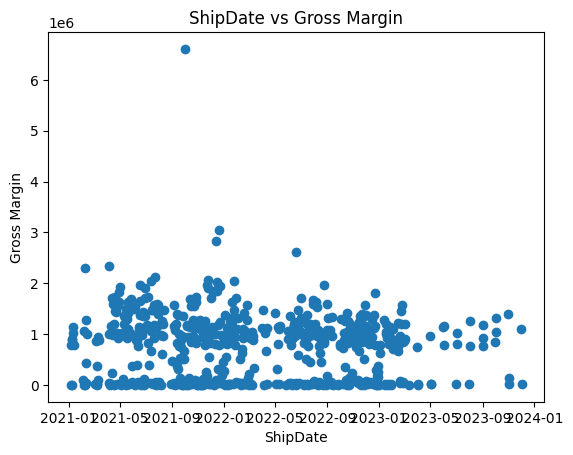

In [ ]:
# create a scatter plot of 'ShipDate' vs 'Gross Margin'
plt.scatter(profit_by_date['ShipDate'], profit_by_date['GrossMargin'])

# set the plot title and axis labels
plt.title('ShipDate vs Gross Margin')
plt.xlabel('ShipDate')
plt.ylabel('Gross Margin')

# display the plot
plt.show()

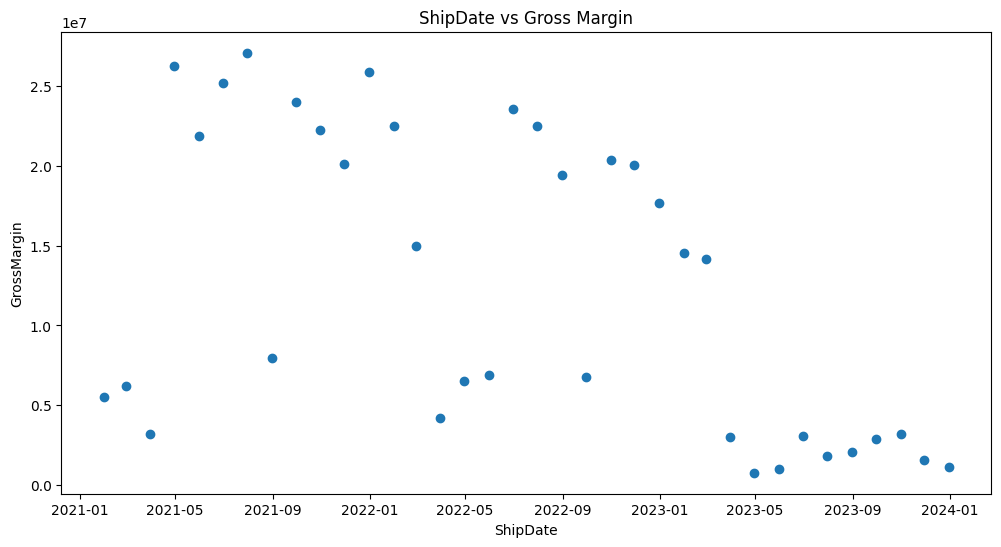

In [ ]:
plt.subplots(figsize=(12, 6))
# create a scatter plot of 'ShipDate' vs 'Gross Margin'
plt.scatter(profit_by_month['ShipDate'], profit_by_month['GrossMargin'])

# set the plot title and axis labels
plt.title('ShipDate vs Gross Margin')
plt.xlabel('ShipDate')
plt.ylabel('GrossMargin')

# display the plot
plt.show()

What is the most popular product type?

Popular 5 product types and 5 least product types


In [ ]:
# Group the data by product type and aggregate the relevant columns
product_data = df.groupby('ProductType').agg({'Qty': 'sum', 'Revenue': 'sum', 'Profit': 'sum', 'CustomerId': 'nunique', 'SalesOrderNumber': 'nunique'})

# Sort the data in descending order based on different columns
popular_product_type_qty = product_data.sort_values('Qty', ascending=False).index[0]
popular_product_type_revenue = product_data.sort_values('Revenue', ascending=False).index[0]
popular_product_type_profit = product_data.sort_values('Profit', ascending=False).index[0]
popular_product_type_customers = product_data.sort_values('CustomerId', ascending=False).index[0]
popular_product_type_orders = product_data.sort_values('SalesOrderNumber', ascending=False).index[0]

# Print the most popular product type based on different criteria
print(f"The most popular product type by quantity is: {popular_product_type_qty}")
print(f"The most popular product type by revenue is: {popular_product_type_revenue}")
print(f"The most popular product type by profit is: {popular_product_type_profit}")
print(f"The most popular product type by number of customers is: {popular_product_type_customers}")
print(f"The most popular product type by number of orders is: {popular_product_type_orders}")


The most popular product type by quantity is: Monitors
The most popular product type by revenue is: Notebook Computers
The most popular product type by profit is: Notebook Computers
The most popular product type by number of customers is: Monitors
The most popular product type by number of orders is: Monitors


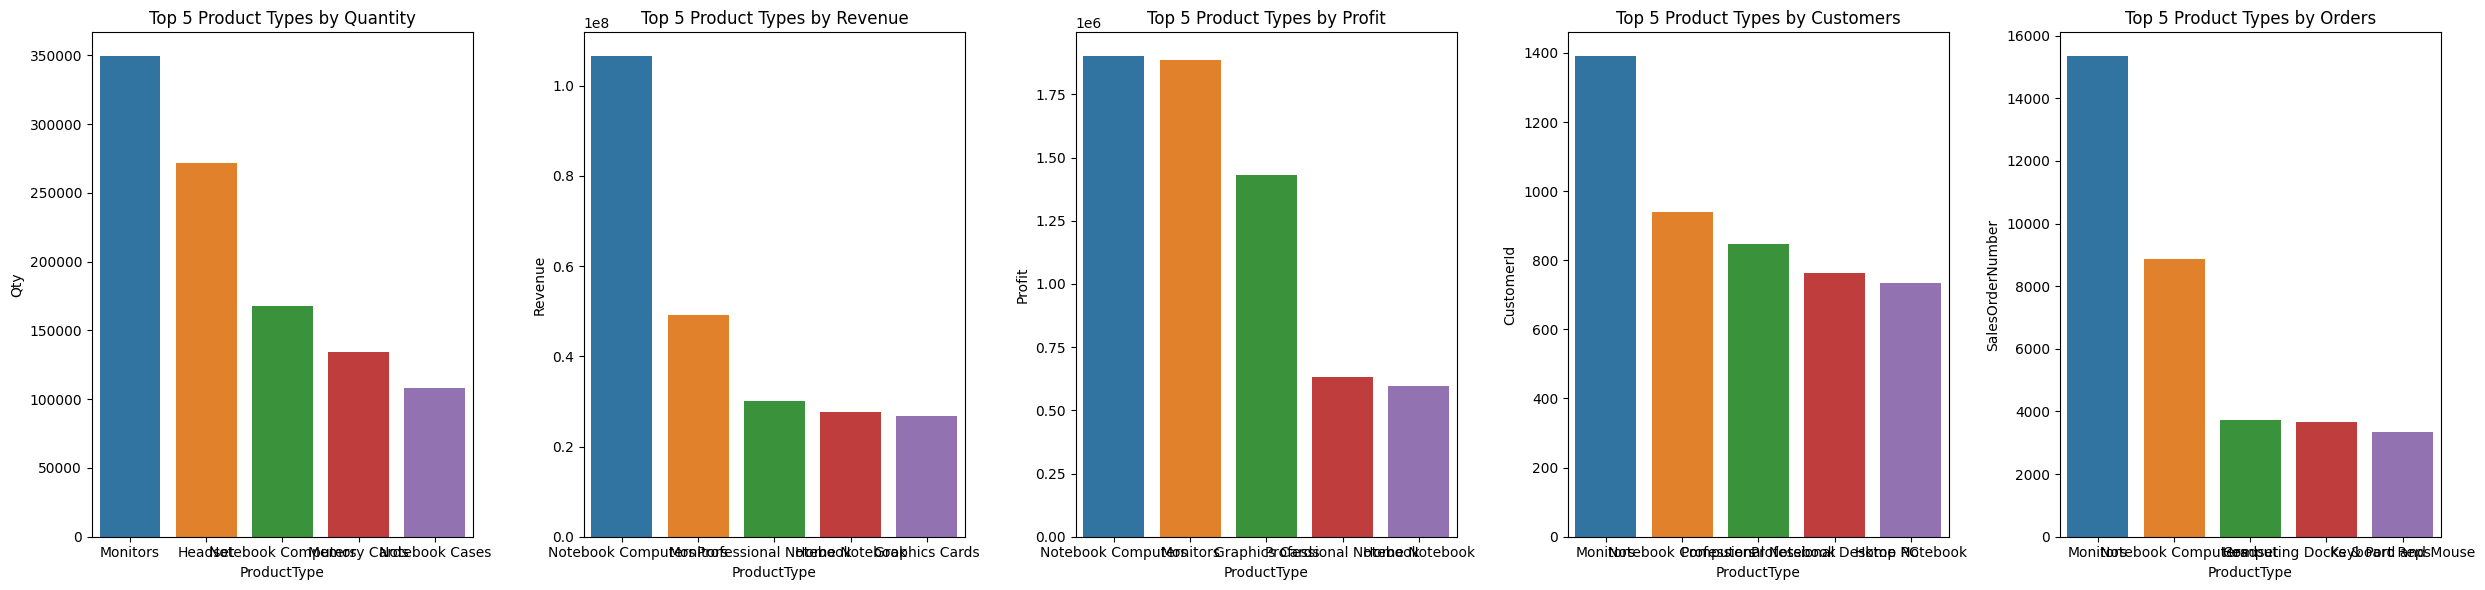

In [ ]:
# Sort the data by each metric in descending order
top_qty = product_data.sort_values('Qty', ascending=False).head(5)
top_revenue = product_data.sort_values('Revenue', ascending=False).head(5)
top_profit = product_data.sort_values('Profit', ascending=False).head(5)
top_customers = product_data.sort_values('CustomerId', ascending=False).head(5)
top_orders = product_data.sort_values('SalesOrderNumber', ascending=False).head(5)

# Set up the subplots
fig, axs = plt.subplots(2, 2, figsize=(25, 6))

# Plot the quantity data
sns.barplot(x=top_qty.index, y=top_qty['Qty'], ax=axs[0])
axs[0].set_title('Top 5 Product Types by Quantity')

# Plot the revenue data
sns.barplot(x=top_revenue.index, y=top_revenue['Revenue'], ax=axs[1])
axs[1].set_title('Top 5 Product Types by Revenue')

# Plot the profit data
sns.barplot(x=top_profit.index, y=top_profit['Profit'], ax=axs[2])
axs[2].set_title('Top 5 Product Types by Profit')

# Plot the customer data
sns.barplot(x=top_customers.index, y=top_customers['CustomerId'], ax=axs[3])
axs[3].set_title('Top 5 Product Types by Customers')

# Plot the order data
sns.barplot(x=top_orders.index, y=top_orders['SalesOrderNumber'], ax=axs[4])
axs[4].set_title('Top 5 Product Types by Orders')

# Display the subplots
plt.tight_layout()
plt.show()


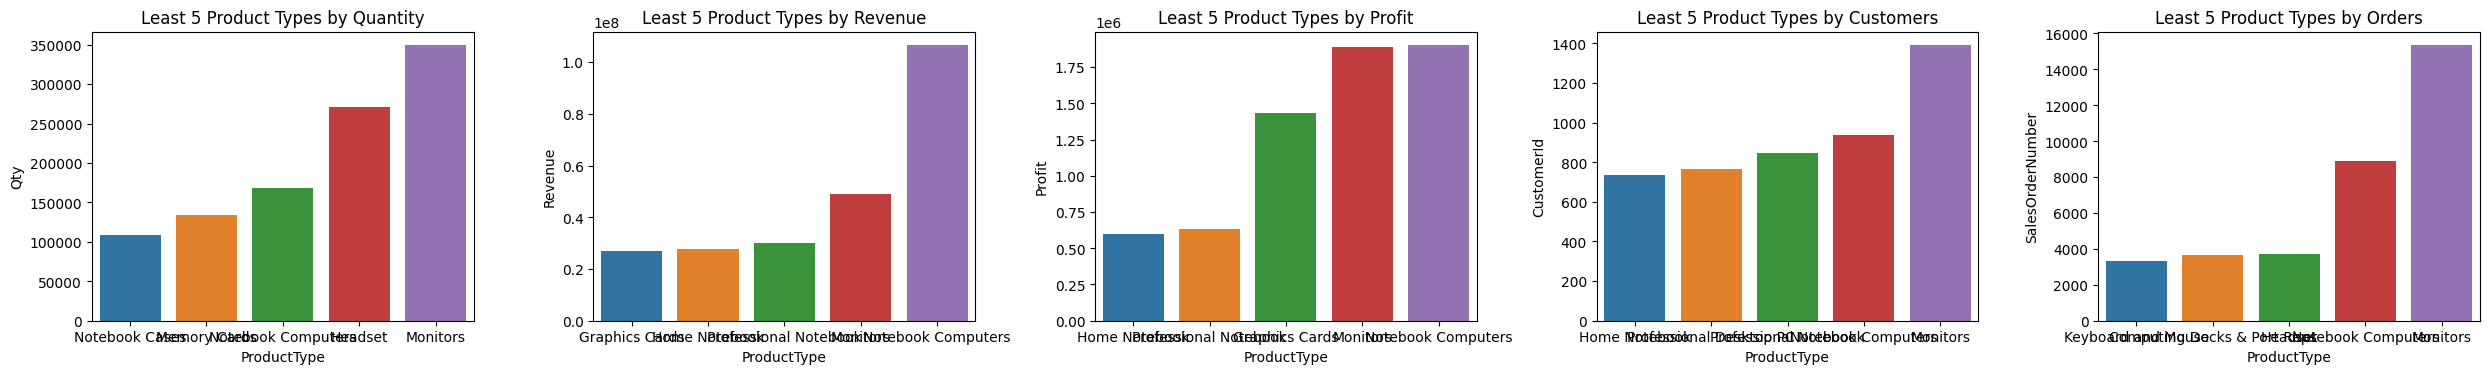

In [ ]:
# Sort the data by each metric in ascending order
least_qty = product_data.sort_values('Qty', ascending=True).tail(5)
least_revenue = product_data.sort_values('Revenue', ascending=True).tail(5)
least_profit = product_data.sort_values('Profit', ascending=True).tail(5)
least_customers = product_data.sort_values('CustomerId', ascending=True).tail(5)
least_orders = product_data.sort_values('SalesOrderNumber', ascending=True).tail(5)

# Set up the subplots
fig, axs = plt.subplots(1, 5, figsize=(25, 4))

# Plot the quantity data
sns.barplot(x=least_qty.index, y=least_qty['Qty'], ax=axs[0])
axs[0].set_title('Least 5 Product Types by Quantity')

# Plot the revenue data
sns.barplot(x=least_revenue.index, y=least_revenue['Revenue'], ax=axs[1])
axs[1].set_title('Least 5 Product Types by Revenue')

# Plot the profit data
sns.barplot(x=least_profit.index, y=least_profit['Profit'], ax=axs[2])
axs[2].set_title('Least 5 Product Types by Profit')

# Plot the customer data
sns.barplot(x=least_customers.index, y=least_customers['CustomerId'], ax=axs[3])
axs[3].set_title('Least 5 Product Types by Customers')

# Plot the order data
sns.barplot(x=least_orders.index, y=least_orders['SalesOrderNumber'], ax=axs[4])
axs[4].set_title('Least 5 Product Types by Orders')

# Display the subplots
plt.tight_layout()
plt.show()


In [ ]:
# Group the data by brand and calculate the total quantity sold for each brand
brand_quantities = df.groupby('Brand')['Qty'].sum()

# Sort the brands by the total quantity sold in descending order
sorted_brands = brand_quantities.sort_values(ascending=False)

# Print the top 5 brands by total quantity sold
print("Top 5 brands by total quantity sold:")
print(sorted_brands.head(5))

# Print the least 5 brands by total quantity sold
print("\nLeast 5 brands by total quantity sold:")
print(sorted_brands.tail(5))

Top 5 brands by total quantity sold:
Brand
Lenovo      459869.0
Dell        377253.0
Poly        237166.0
Startech    223488.0
Epson       124240.0
Name: Qty, dtype: float64

Least 5 brands by total quantity sold:
Brand
FREIGHT         -70.0
Arlo            -77.0
Rackmount IT   -142.0
Hive           -163.0
Devolo         -686.0
Name: Qty, dtype: float64


In [ ]:
# Group the data by brand and aggregate the relevant columns
brand_data = df.groupby('Brand').agg({'Qty': 'sum','Revenue': 'sum','Profit': 'sum','CustomerId': 'nunique','SalesOrderNumber': 'nunique'})

# Sort the data in descending order based on different columns
popular_brands_qty = brand_data.sort_values('Qty', ascending=False).index[0]
popular_brands_revenue = brand_data.sort_values('Revenue', ascending=False).index[0]
popular_brands_profit = brand_data.sort_values('Profit', ascending=False).index[0]
popular_brands_customers = brand_data.sort_values('CustomerId', ascending=False).index[0]
popular_brands_orders = brand_data.sort_values('SalesOrderNumber', ascending=False).index[0]

# Print the most popular brand based on different criteria
print(f"The most popular brand by quantity is: {popular_brands_qty}")
print(f"The most popular brand by revenue is: {popular_brands_revenue}")
print(f"The most popular brand by profit is: {popular_brands_profit}")
print(f"The most popular brand by number of customers is: {popular_brands_customers}")
print(f"The most popular brand by number of orders is: {popular_brands_orders}")


The most popular brand by quantity is: Lenovo
The most popular brand by revenue is: Lenovo
The most popular brand by profit is: Lenovo
The most popular brand by number of customers is: Dell
The most popular brand by number of orders is: Dell


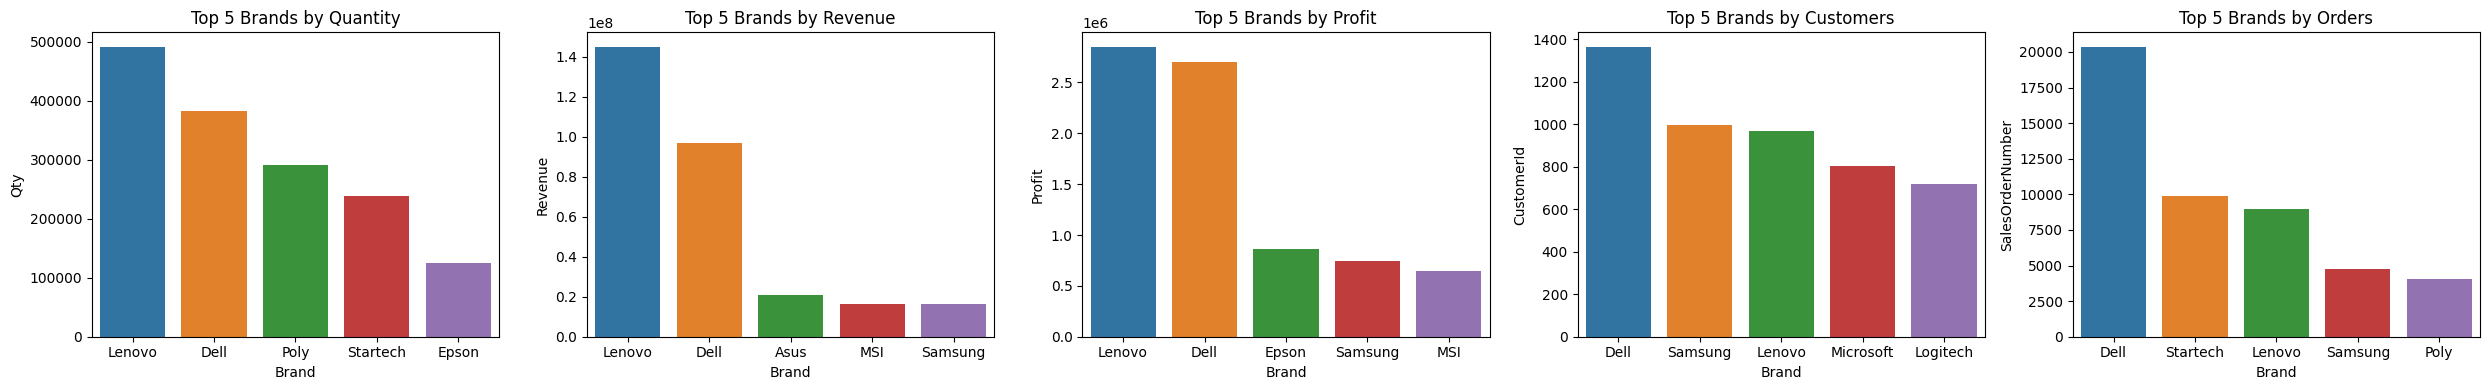

In [ ]:
# Sort the data by each metric in descending order
top_qty = brand_data.sort_values('Qty', ascending=False).head(5)
top_revenue = brand_data.sort_values('Revenue', ascending=False).head(5)
top_profit = brand_data.sort_values('Profit', ascending=False).head(5)
top_customers = brand_data.sort_values('CustomerId', ascending=False).head(5)
top_orders = brand_data.sort_values('SalesOrderNumber', ascending=False).head(5)

# Set up the subplots
fig, axs = plt.subplots(1, 5, figsize=(25, 4))

# Plot the quantity data
sns.barplot(x=top_qty.index, y=top_qty['Qty'], ax=axs[0])
axs[0].set_title('Top 5 Brands by Quantity')

# Plot the revenue data
sns.barplot(x=top_revenue.index, y=top_revenue['Revenue'], ax=axs[1])
axs[1].set_title('Top 5 Brands by Revenue')

# Plot the profit data
sns.barplot(x=top_profit.index, y=top_profit['Profit'], ax=axs[2])
axs[2].set_title('Top 5 Brands by Profit')

# Plot the customer data
sns.barplot(x=top_customers.index, y=top_customers['CustomerId'], ax=axs[3])
axs[3].set_title('Top 5 Brands by Customers')

# Plot the order data
sns.barplot(x=top_orders.index, y=top_orders['SalesOrderNumber'], ax=axs[4])
axs[4].set_title('Top 5 Brands by Orders')

# Display the subplots
plt.tight_layout()
plt.show()

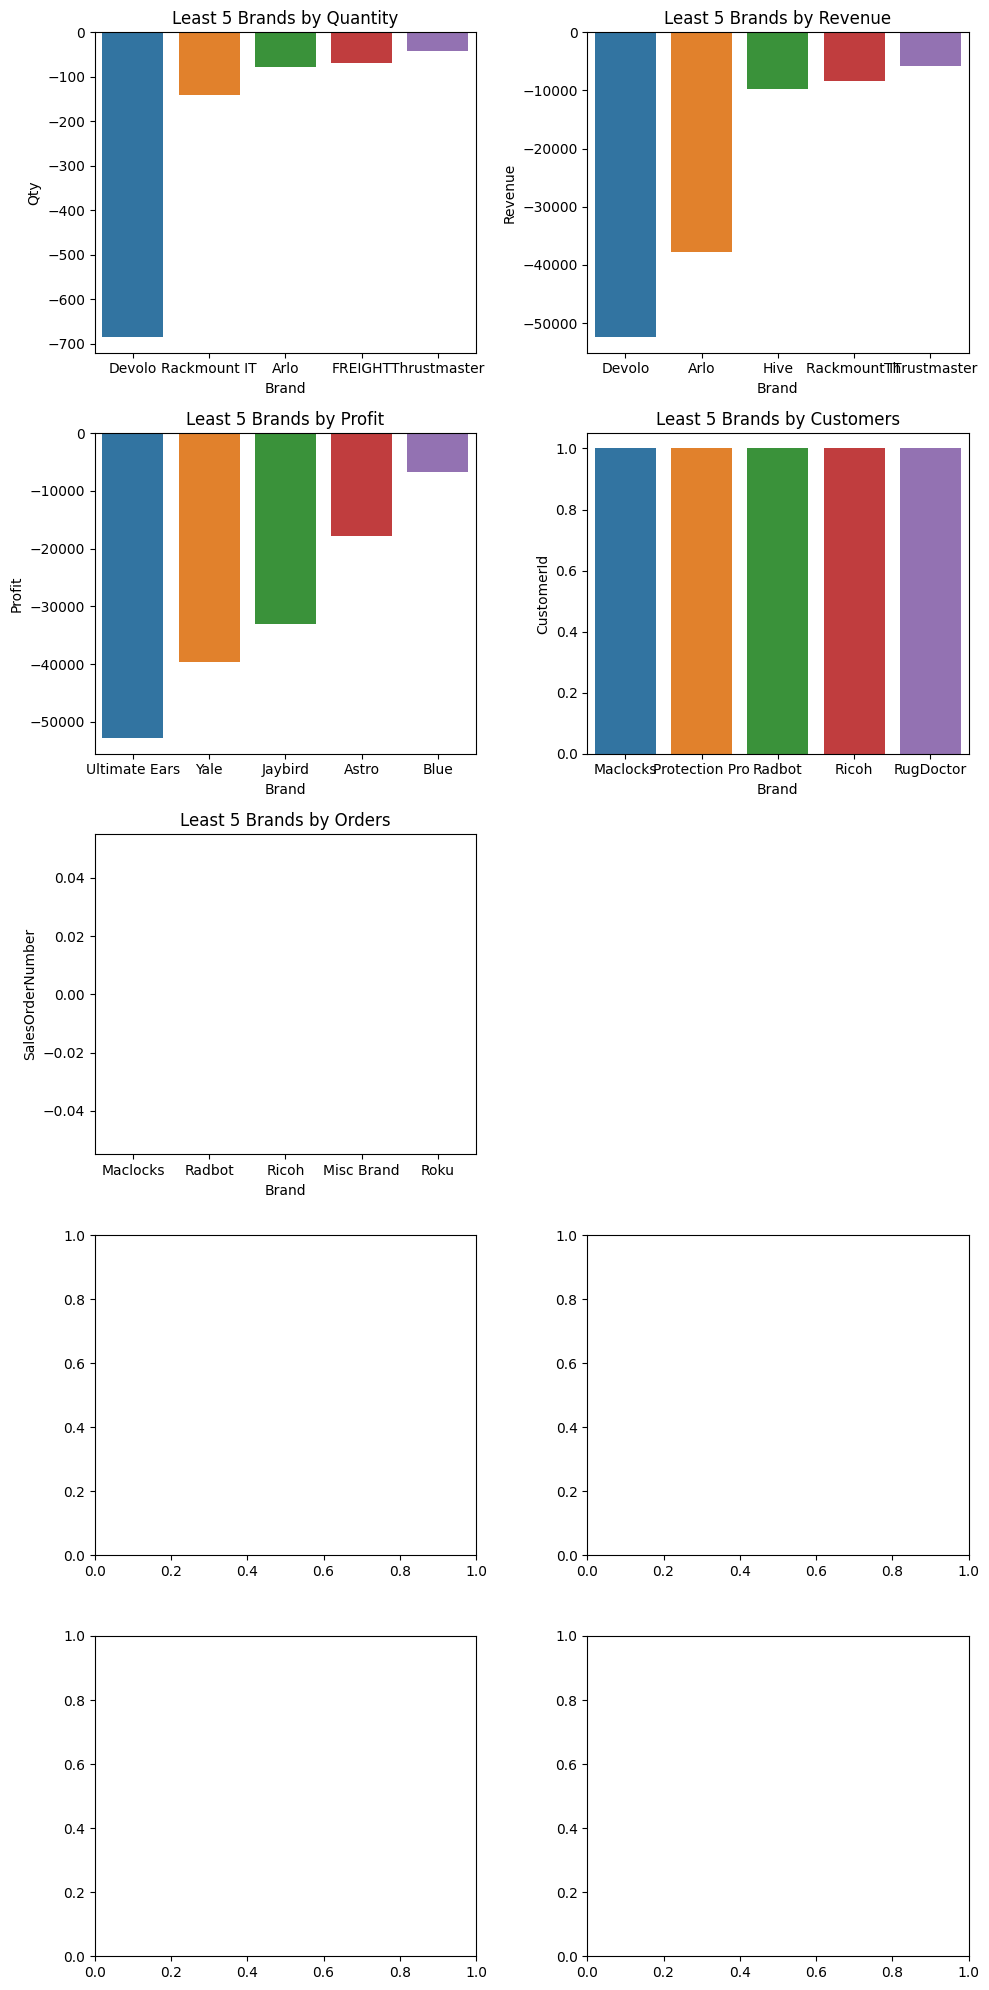

In [ ]:
# Sort the data in ascending order based on different columns to get the least popular brands
least_popular_brands_qty = brand_data.sort_values('Qty', ascending=True).index[0:5]
least_popular_brands_revenue = brand_data.sort_values('Revenue', ascending=True).index[0:5]
least_popular_brands_profit = brand_data.sort_values('Profit', ascending=True).index[0:5]
least_popular_brands_customers = brand_data.sort_values('CustomerId', ascending=True).index[0:5]
least_popular_brands_orders = brand_data.sort_values('SalesOrderNumber', ascending=True).index[0:5]

# Set up the subplots
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

# Plot the quantity data
sns.barplot(x=brand_data.loc[least_popular_brands_qty].index, y=brand_data.loc[least_popular_brands_qty]['Qty'], ax=axs[0,0])
axs[0,0].set_title('Least 5 Brands by Quantity')

# Plot the revenue data
sns.barplot(x=brand_data.loc[least_popular_brands_revenue].index, y=brand_data.loc[least_popular_brands_revenue]['Revenue'], ax=axs[0,1])
axs[0,1].set_title('Least 5 Brands by Revenue')

# Plot the profit data
sns.barplot(x=brand_data.loc[least_popular_brands_profit].index, y=brand_data.loc[least_popular_brands_profit]['Profit'], ax=axs[1,0])
axs[1,0].set_title('Least 5 Brands by Profit')

# Plot the customer data
sns.barplot(x=brand_data.loc[least_popular_brands_customers].index, y=brand_data.loc[least_popular_brands_customers]['CustomerId'], ax=axs[1,1])
axs[1,1].set_title('Least 5 Brands by Customers')

# Plot the order data
sns.barplot(x=brand_data.loc[least_popular_brands_orders].index, y=brand_data.loc[least_popular_brands_orders]['SalesOrderNumber'], ax=axs[2,0])
axs[2,0].set_title('Least 5 Brands by Orders')

# Hide the last subplot
axs[2,1].axis('off')

# Display the subplots
plt.tight_layout()
plt.show()


<ipython-input-59-62eb81d5fef0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brand_qty_profit = df.groupby('Brand')['Qty', 'Profit'].sum()


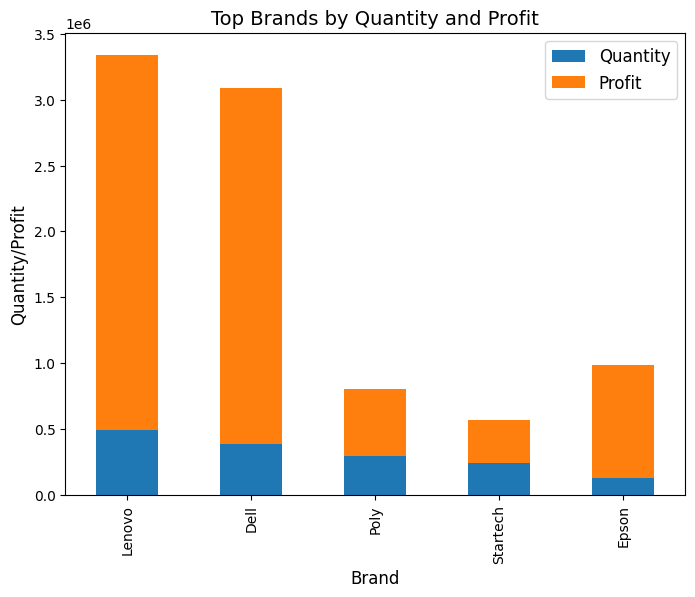

In [ ]:
#Group the data by brand and calculate the sum of quantity and profit for each brand
brand_qty_profit = df.groupby('Brand')['Qty', 'Profit'].sum()

# Sort the brands by the total quantity in descending order
brand_qty_profit = brand_qty_profit.sort_values(by='Qty', ascending=False)

# Get the top 5 brands by quantity
top_brands_qty = brand_qty_profit.index[:5]

# Subset the data for the top 5 brands by quantity
top_brands_qty_profit = brand_qty_profit.loc[top_brands_qty]

# Create a stacked bar chart
ax = top_brands_qty_profit.plot(kind='bar', stacked=True, figsize=(8,6))

# Set the title and axis labels
ax.set_title('Top Brands by Quantity and Profit', fontsize=14)
ax.set_xlabel('Brand', fontsize=12)
ax.set_ylabel('Quantity/Profit', fontsize=12)

# Add a legend
ax.legend(['Quantity', 'Profit'], fontsize=12)

# Show the plot
plt.show()

<ipython-input-72-0b18c560e707>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brand_rev_profit = df.groupby('Brand')['Revenue', 'Profit'].sum()


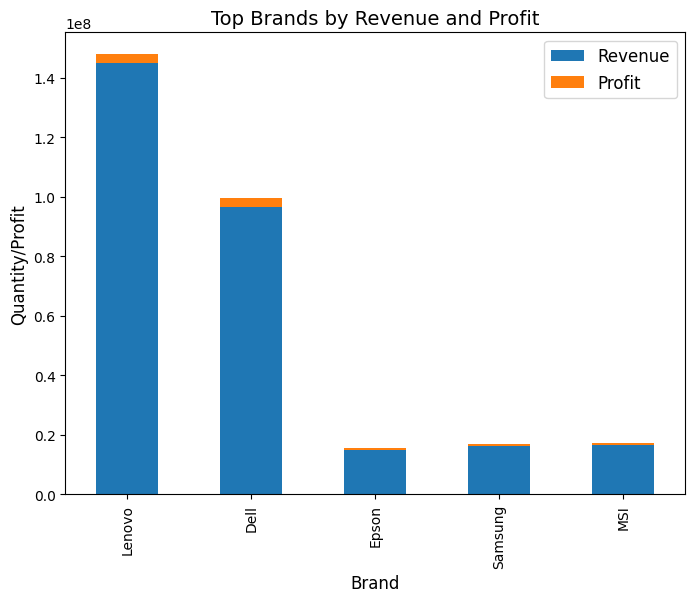

In [ ]:
#Group the data by brand and calculate the sum of quantity and profit for each brand
brand_rev_profit = df.groupby('Brand')['Revenue', 'Profit'].sum()

# Sort the brands by the total quantity in descending order
brand_rev_profit = brand_rev_profit.sort_values(by='Profit', ascending=False)

# Get the top 5 brands by quantity
top_brands_rev = brand_rev_profit.index[:5]

# Subset the data for the top 5 brands by quantity
top_brands_rev_profit = brand_rev_profit.loc[top_brands_rev]

# Create a stacked bar chart
ax = top_brands_rev_profit.plot(kind='bar', stacked=True, figsize=(8,6))

# Set the title and axis labels
ax.set_title('Top Brands by Revenue and Profit', fontsize=14)
ax.set_xlabel('Brand', fontsize=12)
ax.set_ylabel('Quantity/Profit', fontsize=12)

# Add a legend
ax.legend(['Revenue', 'Profit'], fontsize=12)

# Show the plot
plt.show()

What is the relationship between revenue and the number of items purchased (quantity)? 

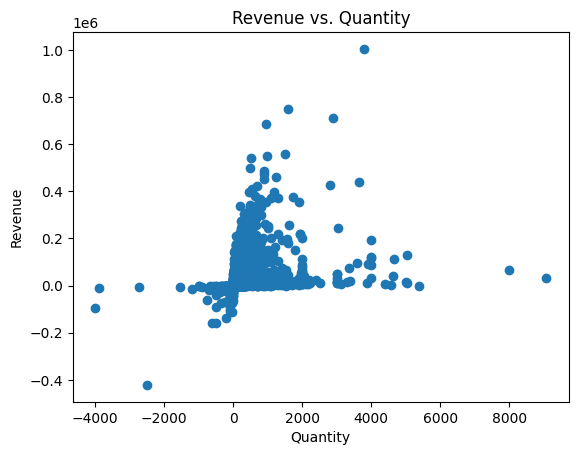

Correlation coefficient: 0.4132442886074178


In [ ]:
# Create a scatter plot of revenue vs. quantity
plt.scatter(df['Qty'], df['Revenue'])
plt.title('Revenue vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.show()

# Calculate the correlation coefficient between revenue and quantity
corr_coef = df['Qty'].corr(df['Revenue'])
print('Correlation coefficient:', corr_coef)

A correlation coefficient of 0.4 indicates a moderate positive relationship between Revenue and Quantity

Which sales team generates the most revenue and profit?

In [ ]:
# group the data by sales team title and calculate the total revenue and profit
grouped = df.groupby('SalesTeamName').agg({'Revenue': 'sum', 'Profit': 'sum'})

# sort the data in descending order based on revenue and profit
sorted_data_by_revenue = grouped.sort_values(by='Revenue', ascending=False)
sorted_data_by_profit = grouped.sort_values(by='Profit', ascending=False)

# get the top sales team(s) with the highest revenue and profit
top_sales_team_by_revenue = sorted_data_by_revenue.head(1)
top_sales_team_by_profit = sorted_data_by_profit.head(1)

print('Top sales team by revenue:')
print(top_sales_team_by_revenue)

print('\nTop sales team by profit:')
print(top_sales_team_by_profit)

Top sales team by revenue:
                      Revenue        Profit
SalesTeamName                              
Corporate South  1.854236e+08  4.260029e+06

Top sales team by profit:
                       Revenue        Profit
SalesTeamName                               
Components North  9.126559e+07  4.439110e+06


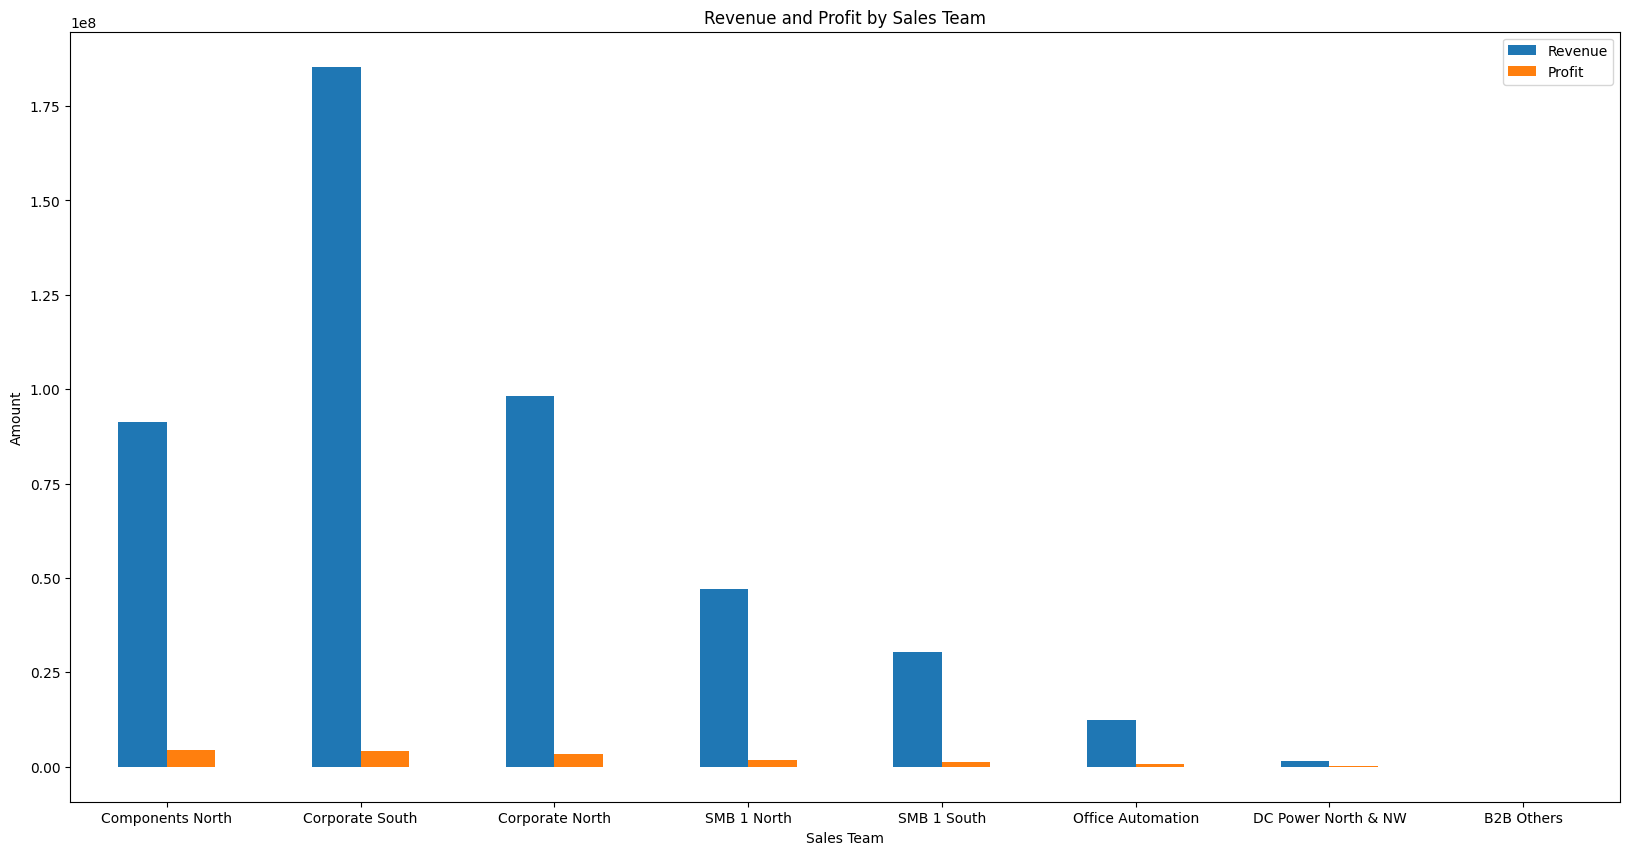

In [ ]:
# create a bar chart for the revenue and profit for each sales team
sorted_data_by_profit.plot(kind='bar', rot=0, figsize = (20,10))

# set the title and labels for the chart
plt.title('Revenue and Profit by Sales Team')
plt.xlabel('Sales Team')
plt.ylabel('Amount')

# show the chart
plt.show()

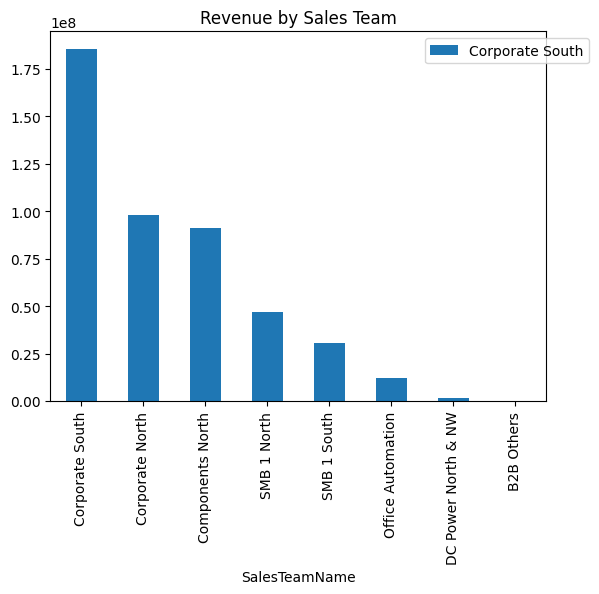

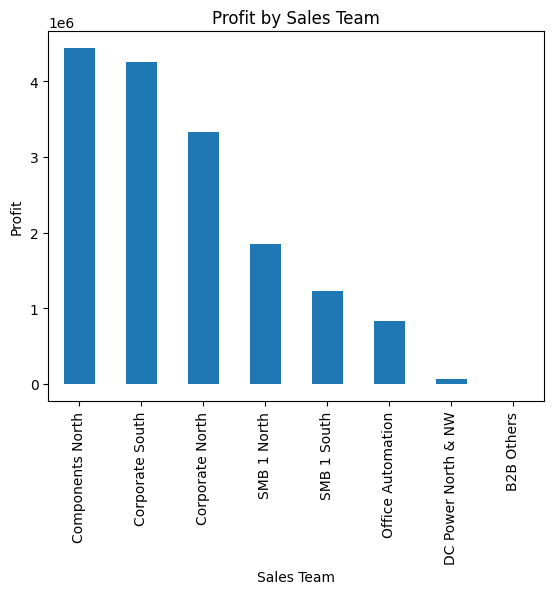

In [ ]:
# create a pie chart for the revenue for each sales team
sorted_data_by_revenue['Revenue'].plot(kind='bar')

# set the title and labels for the chart
plt.title('Revenue by Sales Team')
plt.legend(labels=sorted_data_by_revenue.index, bbox_to_anchor=(1.1, 1))

# show the chart
plt.show()

# create a pie chart for the profit for each sales team
sorted_data_by_profit['Profit'].plot(kind='bar')

# set the title and labels for the chart
plt.title('Profit by Sales Team')
plt.xlabel('Sales Team')
plt.ylabel('Profit')

# show the chart
plt.show()

How has the customers, revenue, , orders and quantity changed over time?

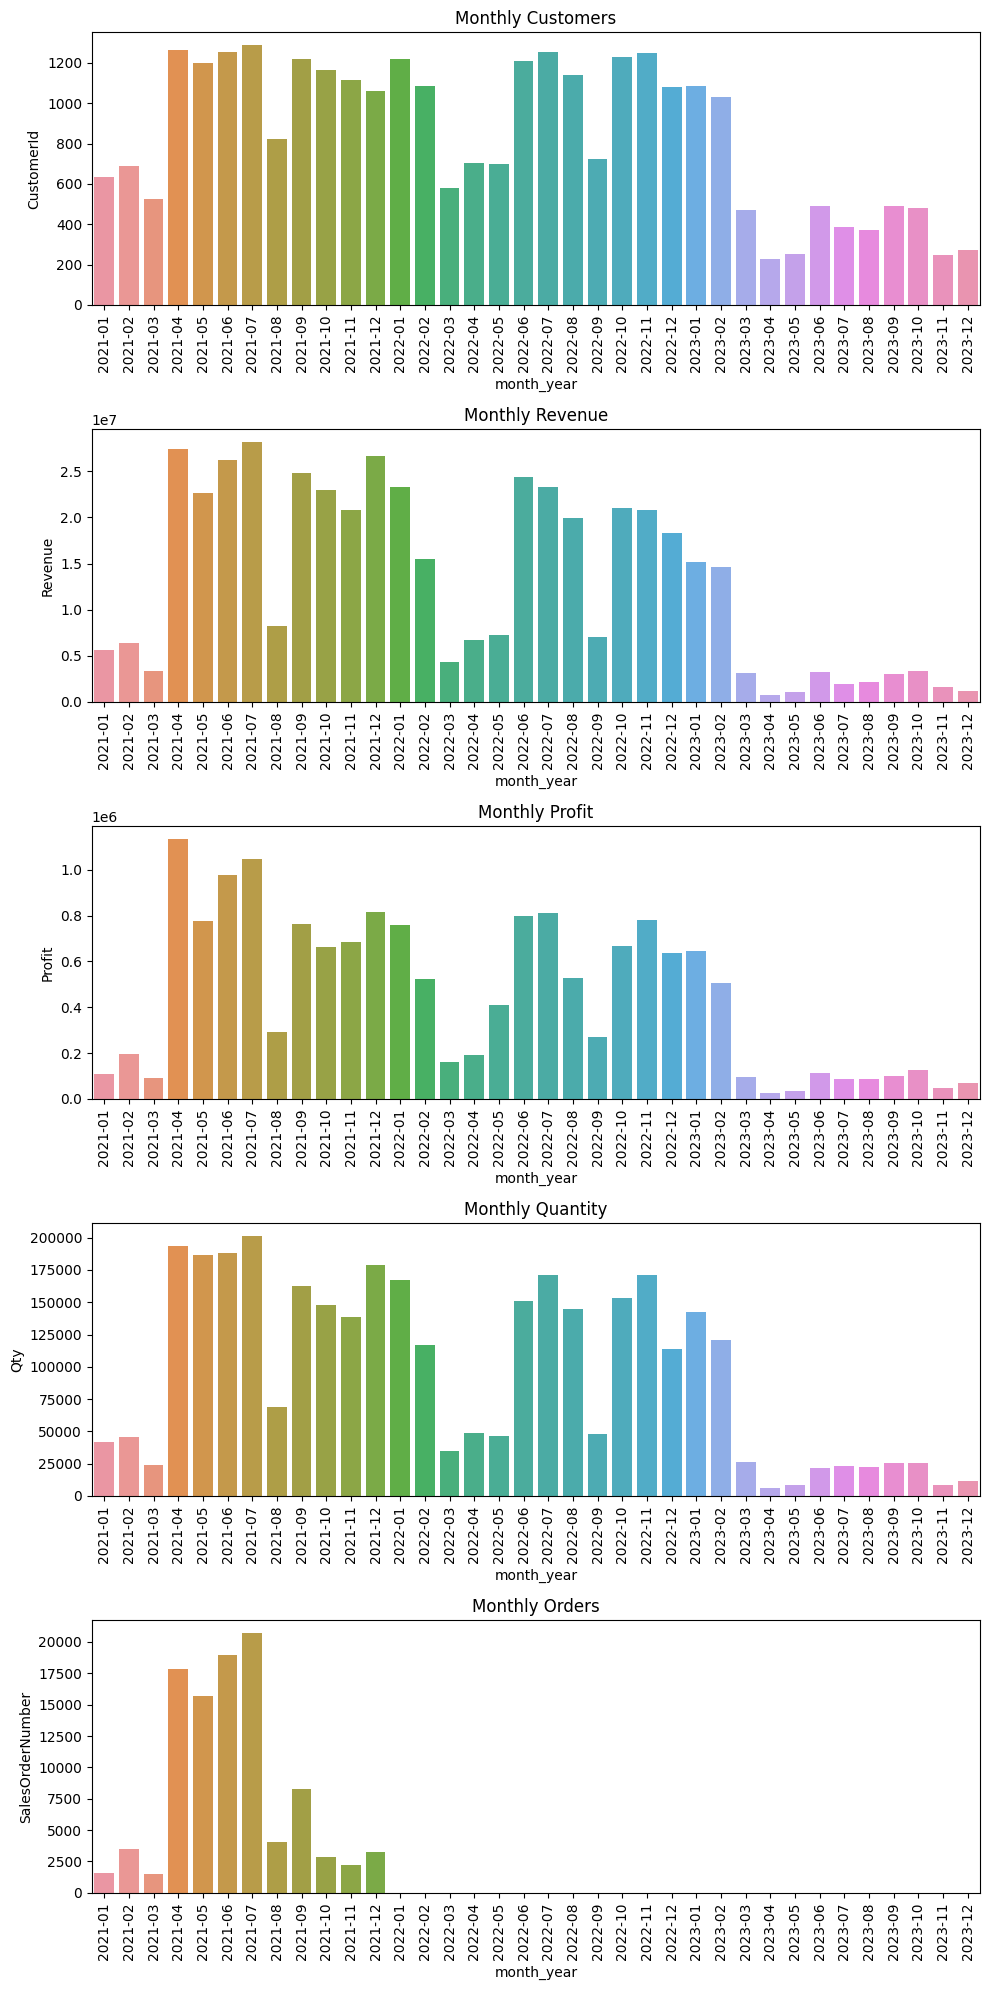

In [ ]:
# Group the data by month_year and calculate the sum for the selected metrics
df['month_year'] = pd.to_datetime(df['ShipDate']).dt.to_period('M')

monthly_data = df.groupby('month_year').agg({'CustomerId': 'nunique',
                                                     'Revenue': 'sum',
                                                     'Profit': 'sum',
                                                     'Qty': 'sum',
                                                     'SalesOrderNumber': 'nunique'})

# Create a bar plot for each metric
fig, axs = plt.subplots(5,1, figsize=(10,20))

sns.barplot(x=monthly_data.index, y=monthly_data['CustomerId'], ax=axs[0])
axs[0].set_title('Monthly Customers')

sns.barplot(x=monthly_data.index, y=monthly_data['Revenue'], ax=axs[1])
axs[1].set_title('Monthly Revenue')

sns.barplot(x=monthly_data.index, y=monthly_data['Profit'], ax=axs[2])
axs[2].set_title('Monthly Profit')

sns.barplot(x=monthly_data.index, y=monthly_data['Qty'], ax=axs[3])
axs[3].set_title('Monthly Quantity')

sns.barplot(x=monthly_data.index, y=monthly_data['SalesOrderNumber'], ax=axs[4])
axs[4].set_title('Monthly Orders')

# Rotate the x-axis labels
for ax in axs:
    ax.tick_params(axis='x', rotation=90)

# Adjust the subplot layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Convert ShipDate column to datetime type
df['ShipDate'] = pd.to_datetime(df['ShipDate'])

# Create a new column month_year
df['month_year'] = df['ShipDate'].dt.strftime('%Y-%m')

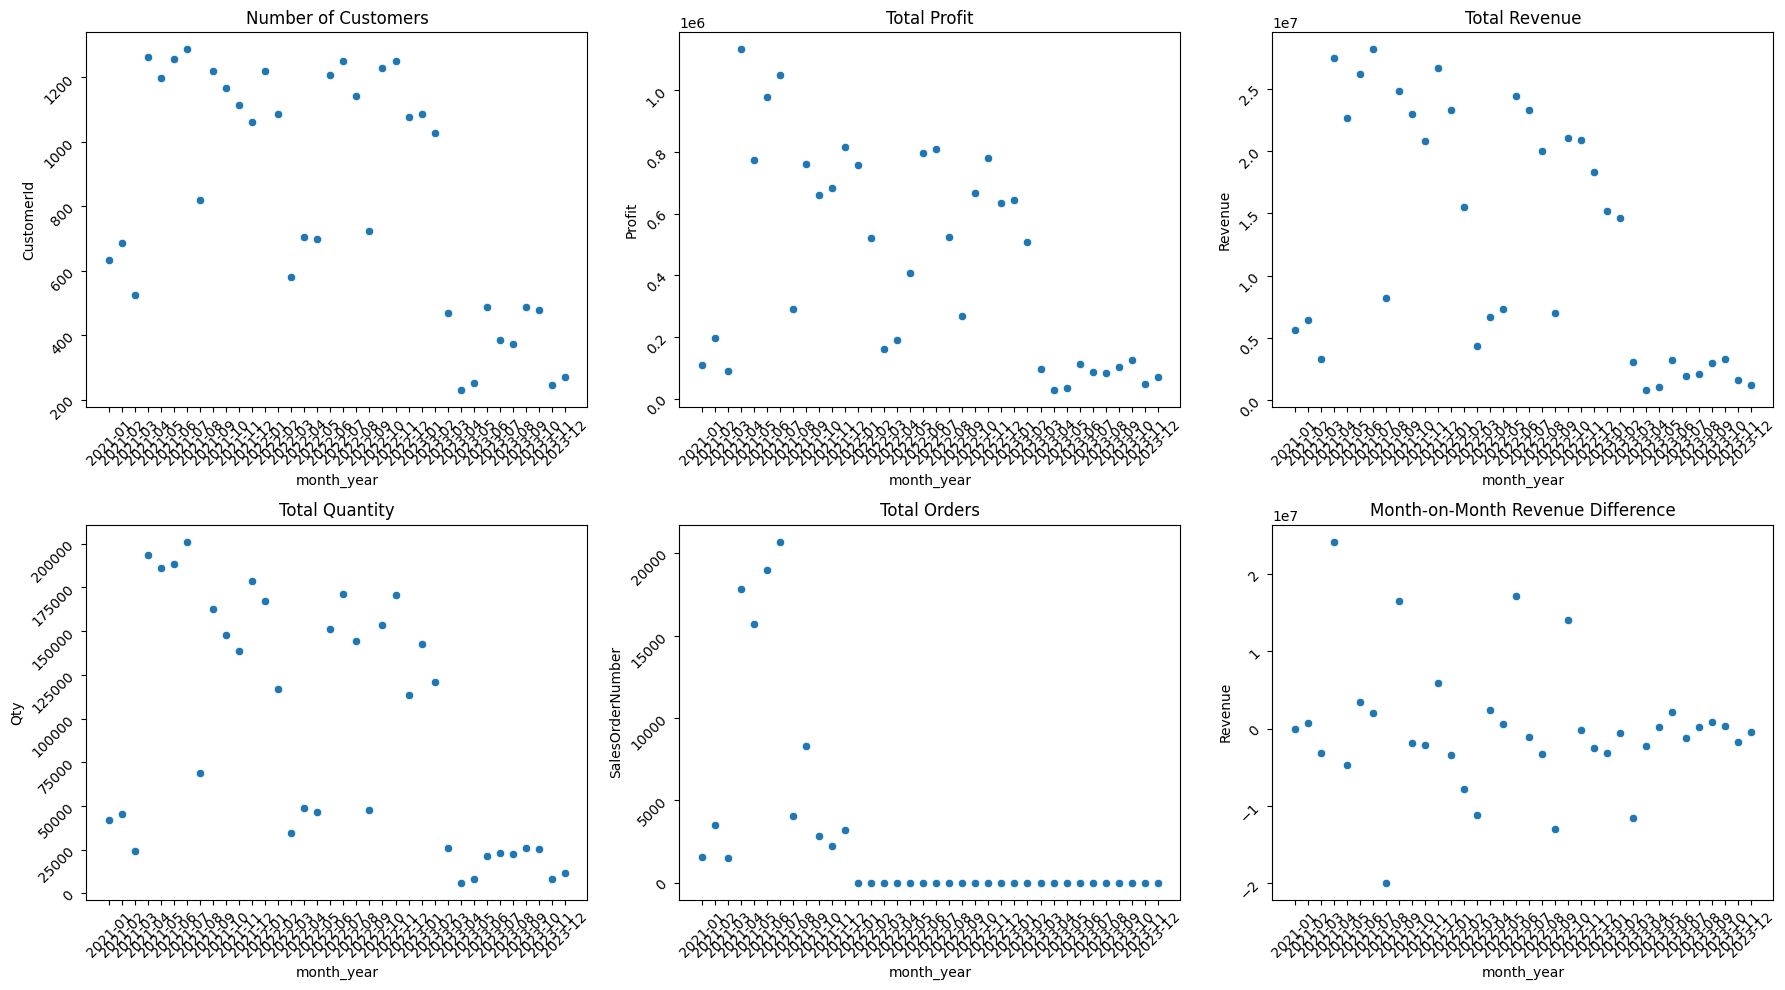

In [ ]:
# Group the data by month_year and aggregate the columns
monthly_data = df.groupby('month_year').agg({'CustomerId': 'nunique',
                                             'Profit': 'sum',
                                             'Revenue': 'sum',
                                             'Qty': 'sum',
                                             'SalesOrderNumber': 'nunique'})

# Compute month-on-month differences
monthly_data_diff = monthly_data.diff().fillna(0)

# Create scatter plots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

sns.scatterplot(x=monthly_data.index, y=monthly_data['CustomerId'], ax=axs[0, 0])
axs[0, 0].set_title('Number of Customers')

sns.scatterplot(x=monthly_data.index, y=monthly_data['Profit'], ax=axs[0, 1])
axs[0, 1].set_title('Total Profit')

sns.scatterplot(x=monthly_data.index, y=monthly_data['Revenue'], ax=axs[0, 2])
axs[0, 2].set_title('Total Revenue')

sns.scatterplot(x=monthly_data.index, y=monthly_data['Qty'], ax=axs[1, 0])
axs[1, 0].set_title('Total Quantity')

sns.scatterplot(x=monthly_data.index, y=monthly_data['SalesOrderNumber'], ax=axs[1, 1])
axs[1, 1].set_title('Total Orders')

sns.scatterplot(x=monthly_data_diff.index, y=monthly_data_diff['Revenue'], ax=axs[1, 2])
axs[1, 2].set_title('Month-on-Month Revenue Difference')

# Rotate x-axis labels for better visibility
for ax in axs.flat:
    ax.tick_params(labelrotation=45)

# Display the subplots
plt.tight_layout()
plt.show()


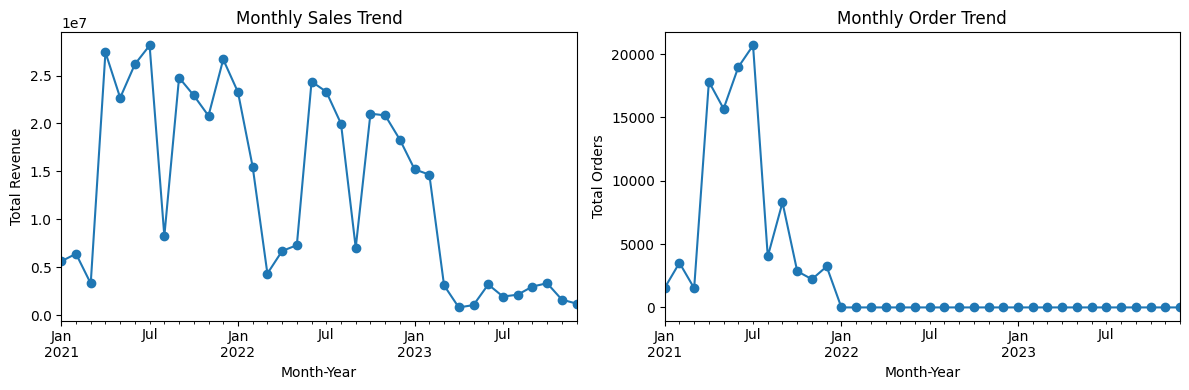

In [ ]:
df['MonthYear'] = pd.to_datetime(df['ShipDate']).dt.to_period('M')

# Calculate the totals for each month and metric
monthly_totals = df.groupby('MonthYear').agg({
    'Revenue': 'sum',
    'SalesOrderNumber': 'nunique'
})

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the monthly sales trend
monthly_totals['Revenue'].plot(ax=axs[0], marker='o')
axs[0].set_xlabel('Month-Year')
axs[0].set_ylabel('Total Revenue')
axs[0].set_title('Monthly Sales Trend')

# Plot the monthly order trend
monthly_totals['SalesOrderNumber'].plot(ax=axs[1], marker='o')
axs[1].set_xlabel('Month-Year')
axs[1].set_ylabel('Total Orders')
axs[1].set_title('Monthly Order Trend')

# Display the subplots
plt.tight_layout()
plt.show()

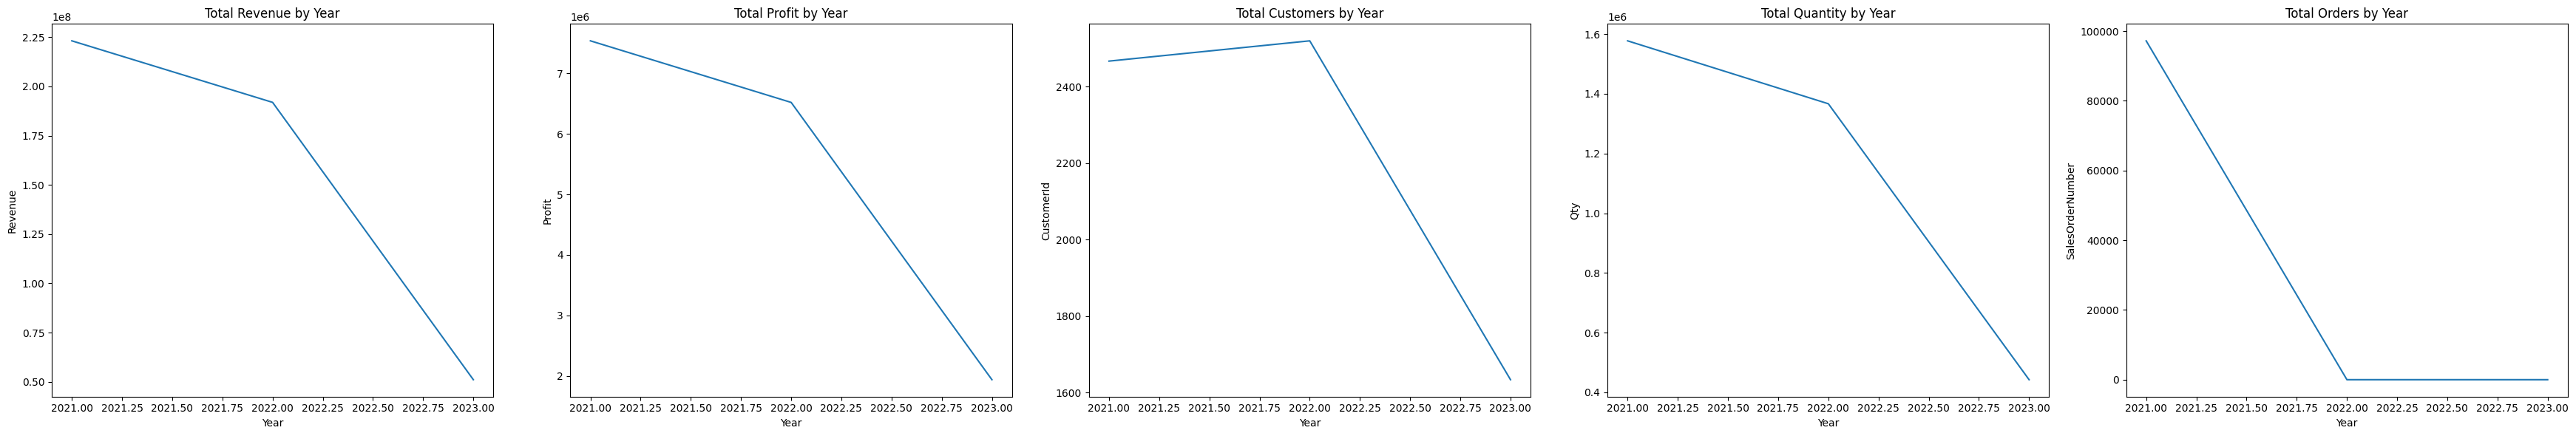

In [ ]:
# Create a Year column from the ShipDate
df['Year'] = df['ShipDate'].dt.year

# Calculate total revenue, profit, customers, quantity, and orders by year
yearly_data = df.groupby('Year').agg({'Revenue': 'sum', 'Profit': 'sum', 'CustomerId': 'nunique', 'Qty': 'sum', 'SalesOrderNumber': 'nunique'})

# Plot a line chart for each metric
fig, axs = plt.subplots(1, 5, figsize=(35, 6))

sns.lineplot(x=yearly_data.index, y=yearly_data['Revenue'], ax=axs[0])
axs[0].set_title('Total Revenue by Year')

sns.lineplot(x=yearly_data.index, y=yearly_data['Profit'], ax=axs[1])
axs[1].set_title('Total Profit by Year')

sns.lineplot(x=yearly_data.index, y=yearly_data['CustomerId'], ax=axs[2])
axs[2].set_title('Total Customers by Year')

sns.lineplot(x=yearly_data.index, y=yearly_data['Qty'], ax=axs[3])
axs[3].set_title('Total Quantity by Year')

sns.lineplot(x=yearly_data.index, y=yearly_data['SalesOrderNumber'], ax=axs[4])
axs[4].set_title('Total Orders by Year')

plt.tight_layout()
plt.show()


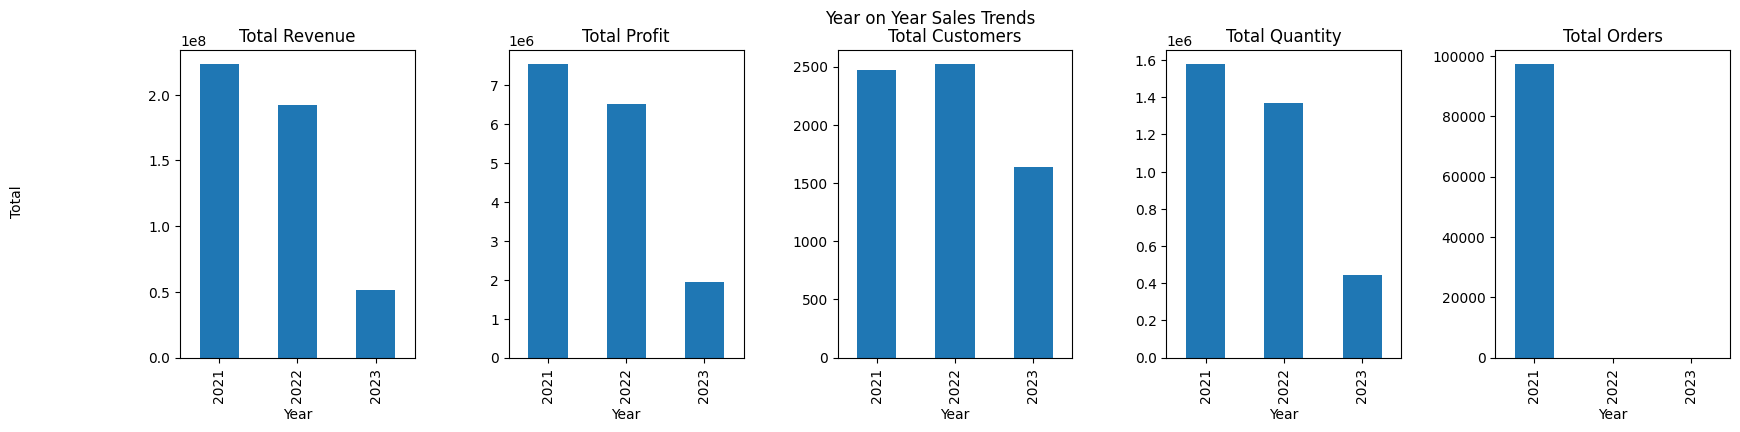

In [ ]:
# Convert the ShipDate column to datetime and extract the year
df['Year'] = pd.to_datetime(df['ShipDate']).dt.year

# Calculate the totals for each year and metric
yearly_totals = df.groupby('Year').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'CustomerId': 'nunique',
    'Qty': 'sum',
    'SalesOrderNumber': 'nunique'
})

# Plot the bar graphs side by side
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
yearly_totals['Revenue'].plot(kind='bar', ax=axs[0])
axs[0].set_title('Total Revenue')

yearly_totals['Profit'].plot(kind='bar', ax=axs[1])
axs[1].set_title('Total Profit')

yearly_totals['CustomerId'].plot(kind='bar', ax=axs[2])
axs[2].set_title('Total Customers')

yearly_totals['Qty'].plot(kind='bar', ax=axs[3])
axs[3].set_title('Total Quantity')

yearly_totals['SalesOrderNumber'].plot(kind='bar', ax=axs[4])
axs[4].set_title('Total Orders')

# Set the y-axis labels for each subplot
for ax in axs:
    ax.set_ylabel('')

# Add a common y-axis label
fig.text(0.04, 0.5, 'Total', va='center', rotation='vertical')

# Add a common title
fig.suptitle('Year on Year Sales Trends')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()

customer analysis

1. number of distinct customers for 2021, 2022, 2023

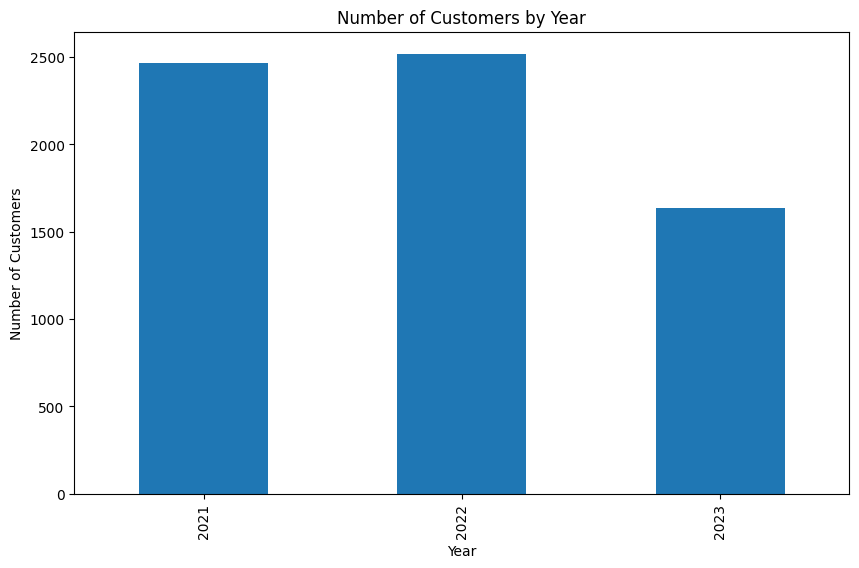

In [ ]:
# Group the data by year and count the number of unique customers
yearly_customers = df.groupby('Year')['CustomerId'].nunique()

# Plot the results as a bar graph
yearly_customers.plot(kind='bar', figsize=(10,6))
plt.title('Number of Customers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()

customer analysis for 2021 ans 2022

In [ ]:
# Group the data by year and count the number of unique customers in each group
yearly_customers = df.groupby('Year')['CustomerId'].nunique()

# Print the yearly customer counts
yearly_customers.head()

Year
2021    2467
2022    2520
2023    1634
Name: CustomerId, dtype: int64

In [ ]:
# Get the set of customers in year 1 and year 2 and year 3
customers_2021 = set(df[df['Year'] == 2021]['CustomerId'])
customers_2022 = set(df[df['Year'] == 2022]['CustomerId'])
customers_2023 = set(df[df['Year'] == 2023]['CustomerId'])

In [ ]:
# Get the set of customers repeated in 2022
repeated_customers_2022 = customers_2022.intersection(customers_2021)

# Get the set of customers lost in 2022
lost_customers_2022 = customers_2021 - customers_2022

# Get the set of newly added customers in 2022
new_customers_2022 = customers_2022 - customers_2021

print(f"Number of repeated customers in 2022: {len(repeated_customers_2022)}")
print(f"Number of lost customers in 2022: {len(lost_customers_2022)}")
print(f"Number of newly added customers in 2022: {len(new_customers_2022)}")

Number of repeated customers in 2022: 1795
Number of lost customers in 2022: 672
Number of newly added customers in 2022: 725


In [ ]:
# Get the set of customers who are repeated in 2022 and 2023
repeated_customers_2023 = customers_2022.intersection(customers_2023)

# Get the set of customers who are in 2022 but not in 2023
lost_customers_2023 = customers_2022 - customers_2023

# Get the set of customers who are in 2023 but not in 2022
new_customers_2023 = customers_2023 - customers_2022

print(f"Number of repeated customers in 2022 and 2023: {len(repeated_customers_2023)}")
print(f"Number of lost customers in 2023: {len(lost_customers_2023)}")
print(f"Number of newly added customers in 2023: {len(new_customers_2023)}")

Number of repeated customers in 2022 and 2023: 1458
Number of lost customers in 2023: 1062
Number of newly added customers in 2023: 176


In [ ]:
# Calculate the set of repeated customers
repeated_customers_from_2021 = customers_2023.intersection(customers_2021)
# Calculate the set of lost customers
lost_customers_in_2023 = customers_2021 - customers_2023
# Calculate the set of newly added customers
new_customers_of_2023 = customers_2023 - customers_2021

# Print the number of customers in each category
print(f"Number of repeated customers: {len(repeated_customers_from_2021)}")
print(f"Number of lost customers: {len(lost_customers_in_2023)}")
print(f"Number of newly added customers: {len(new_customers_of_2023)}")

Number of repeated customers: 1240
Number of lost customers: 1227
Number of newly added customers: 394


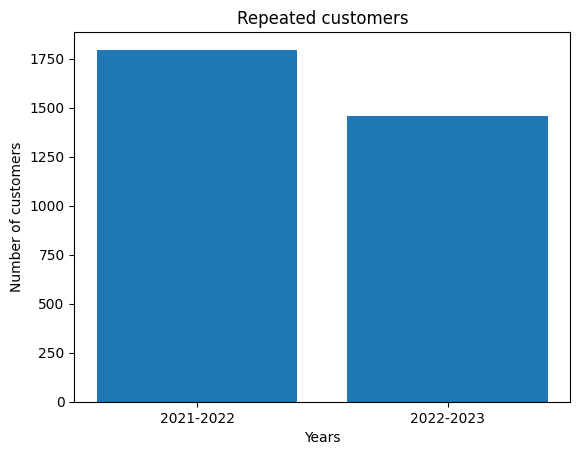

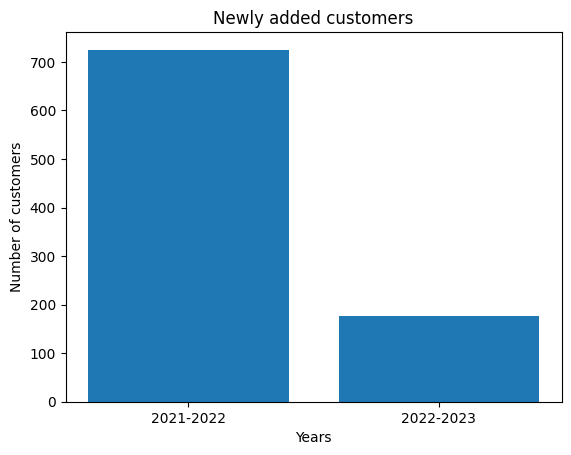

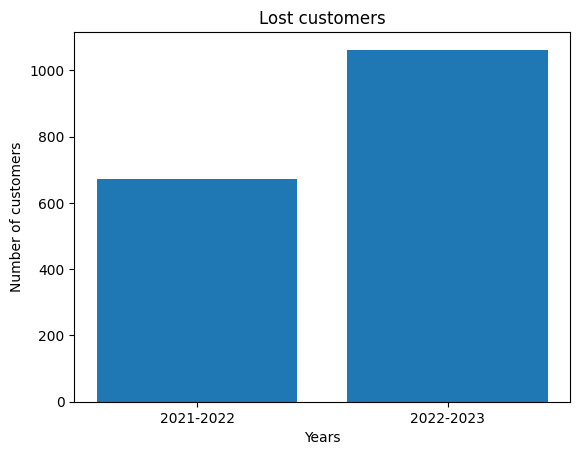

In [ ]:
# Create bar graphs to visualize the results
plt.bar(['2021-2022', '2022-2023'], [len(repeated_customers_2022), len(repeated_customers_2023)])
plt.title('Repeated customers')
plt.xlabel('Years')
plt.ylabel('Number of customers')
plt.show()

plt.bar(['2021-2022', '2022-2023'], [len(new_customers_2022), len(new_customers_2023)])
plt.title('Newly added customers')
plt.xlabel('Years')
plt.ylabel('Number of customers')
plt.show()

plt.bar(['2021-2022', '2022-2023'], [len(lost_customers_2022), len(lost_customers_2023)])
plt.title('Lost customers')
plt.xlabel('Years')
plt.ylabel('Number of customers')
plt.show()

In [ ]:
# Filter the data for repeated customers in 2022
repeated_customers_2022_data = df[(df['Year'] == 2022) & (df['CustomerId'].isin(repeated_customers_2022))]

# Calculate the revenue, profit, and total number of orders made by the repeated customers in 2022
repeated_customers_2022_metrics = repeated_customers_2022_data.groupby('CustomerId').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'SalesOrderNumber': 'nunique'
})

# Print the results
print(repeated_customers_2022_metrics)

                  Revenue        Profit  SalesOrderNumber
CustomerId                                               
100000003      508.994123     27.499338                 0
100000005     1054.072856     22.012362                 0
100000015      864.713931    103.031636                 0
100000034    21783.373520   1873.045531                 0
100000038     4328.703118    661.015618                 0
...                   ...           ...               ...
100020941     2969.275500    171.945120                 0
100020966      770.736917   -107.588927                 0
100021080     2960.456590    230.677888                 0
100021191   389902.342948  14950.180364                 0
100021304       50.237157      8.965150                 0

[1795 rows x 3 columns]


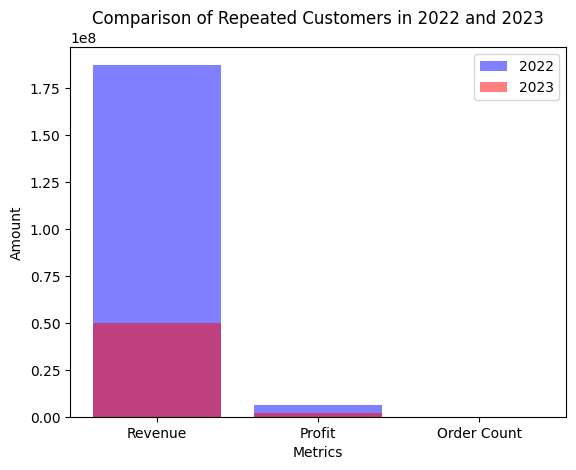

In [ ]:
# Calculate revenue, profit, and total number of orders made by repeated customers in 2022 and 2023
repeated_customers_2022_revenue = df[(df['CustomerId'].isin(repeated_customers_2022)) & (df['Year'] == 2022)]['Revenue'].sum()
repeated_customers_2022_profit = df[(df['CustomerId'].isin(repeated_customers_2022)) & (df['Year'] == 2022)]['Profit'].sum()
repeated_customers_2022_order_count = df[(df['CustomerId'].isin(repeated_customers_2022)) & (df['Year'] == 2022)]['SalesOrderNumber'].nunique()

repeated_customers_2023_revenue = df[(df['CustomerId'].isin(repeated_customers_2023)) & (df['Year'] == 2023)]['Revenue'].sum()
repeated_customers_2023_profit = df[(df['CustomerId'].isin(repeated_customers_2023)) & (df['Year'] == 2023)]['Profit'].sum()
repeated_customers_2023_order_count = df[(df['CustomerId'].isin(repeated_customers_2023)) & (df['Year'] == 2023)]['SalesOrderNumber'].nunique()

# Create a bar chart comparing revenue, profit, and total number of orders made by repeated customers in 2022 and 2023
plt.bar(['Revenue', 'Profit', 'Order Count'], [repeated_customers_2022_revenue, repeated_customers_2022_profit, repeated_customers_2022_order_count], color='blue', alpha=0.5, label='2022')
plt.bar(['Revenue', 'Profit', 'Order Count'], [repeated_customers_2023_revenue, repeated_customers_2023_profit, repeated_customers_2023_order_count], color='red', alpha=0.5, label='2023')
plt.xlabel('Metrics')
plt.ylabel('Amount')
plt.title('Comparison of Repeated Customers in 2022 and 2023')
plt.legend()
plt.show()

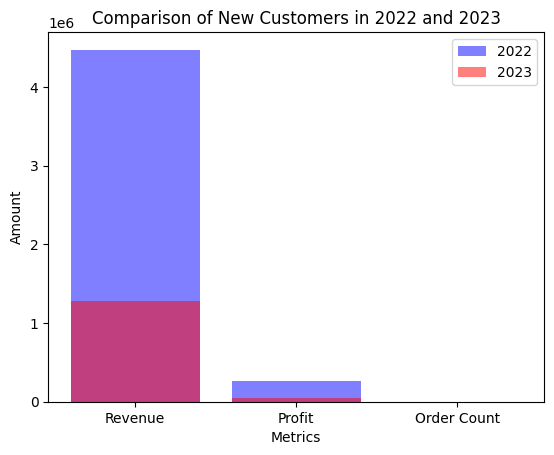

In [ ]:
# Calculate revenue, profit, and total number of orders made by new customers in 2022 and 2023
new_customers_2022_revenue = df[(df['CustomerId'].isin(new_customers_2022)) & (df['Year'] == 2022)]['Revenue'].sum()
new_customers_2022_profit = df[(df['CustomerId'].isin(new_customers_2022)) & (df['Year'] == 2022)]['Profit'].sum()
new_customers_2022_order_count = df[(df['CustomerId'].isin(new_customers_2022)) & (df['Year'] == 2022)]['SalesOrderNumber'].nunique()

new_customers_2023_revenue = df[(df['CustomerId'].isin(new_customers_2023)) & (df['Year'] == 2023)]['Revenue'].sum()
new_customers_2023_profit = df[(df['CustomerId'].isin(new_customers_2023)) & (df['Year'] == 2023)]['Profit'].sum()
new_customers_2023_order_count = df[(df['CustomerId'].isin(new_customers_2023)) & (df['Year'] == 2023)]['SalesOrderNumber'].nunique()

# Create a bar chart comparing revenue, profit, and total number of orders made by new customers in 2022 and 2023
plt.bar(['Revenue', 'Profit', 'Order Count'], [new_customers_2022_revenue, new_customers_2022_profit, new_customers_2022_order_count], color='blue', alpha=0.5, label='2022')
plt.bar(['Revenue', 'Profit', 'Order Count'], [new_customers_2023_revenue, new_customers_2023_profit, new_customers_2023_order_count], color='red', alpha=0.5, label='2023')
plt.xlabel('Metrics')
plt.ylabel('Amount')
plt.title('Comparison of New Customers in 2022 and 2023')
plt.legend()
plt.show()

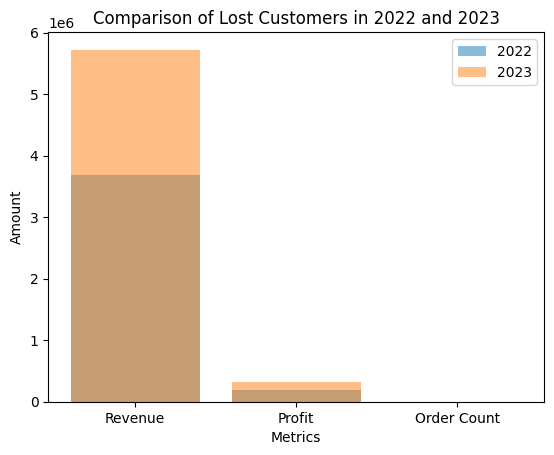

In [ ]:
# Calculate revenue, profit, and total number of orders made by lost customers in 2022 and 2023
lost_customers_2022_revenue = df[(df['CustomerId'].isin(lost_customers_2022)) & (df['Year'] == 2021)]['Revenue'].sum()
lost_customers_2022_profit = df[(df['CustomerId'].isin(lost_customers_2022)) & (df['Year'] == 2021)]['Profit'].sum()
lost_customers_2022_order_count = df[(df['CustomerId'].isin(lost_customers_2022)) & (df['Year'] == 2021)]['SalesOrderNumber'].nunique()

lost_customers_2023_revenue = df[(df['CustomerId'].isin(lost_customers_2023)) & (df['Year'] == 2022)]['Revenue'].sum()
lost_customers_2023_profit = df[(df['CustomerId'].isin(lost_customers_2023)) & (df['Year'] == 2022)]['Profit'].sum()
lost_customers_2023_order_count = df[(df['CustomerId'].isin(lost_customers_2023)) & (df['Year'] == 2022)]['SalesOrderNumber'].nunique()

# Create a bar chart comparing revenue, profit, and total number of orders made by lost customers in 2022 and 2023
plt.bar(['Revenue', 'Profit', 'Order Count'], [lost_customers_2022_revenue, lost_customers_2022_profit, lost_customers_2022_order_count], alpha=0.5, label='2022')
plt.bar(['Revenue', 'Profit', 'Order Count'], [lost_customers_2023_revenue, lost_customers_2023_profit, lost_customers_2023_order_count], alpha=0.5, label='2023')
plt.xlabel('Metrics')
plt.ylabel('Amount')
plt.title('Comparison of Lost Customers in 2022 and 2023')
plt.legend()
plt.show()


In [ ]:
lost_customers_2022_revenue = df[(df['CustomerId'].isin(lost_customers_2022)) & (df['Year'] == 2021)]['Revenue'].sum()
print(lost_customers_2022_revenue)

3689963.623771754


In [ ]:
lost_customers_2023_revenue = df[(df['CustomerId'].isin(lost_customers_2023)) & (df['Year'] == 2022)]['Revenue'].sum()
print(lost_customers_2023_revenue)

5722639.2687255135


How does the profit margin vary across different product types and brands?

In [ ]:
_#mean,median and mode of revenue, profit, and freight cost
mean_rev = df['Revenue'].mean()
median_rev = df['Revenue'].median()
std_rev = df['Revenue'].std()

mean_profit = df['Profit'].mean()
median_profit = df['Profit'].median()
std_profit = df['Profit'].std()

mean_fc = df['Freight cost'].mean()
median_fc = df['Freight cost'].median()
std_fc = df['Freight cost'].std()

print("Revenue: Mean={}, Median={}, StdDev={}".format(mean_rev, median_rev, std_rev))
print("Profit: Mean={}, Median={}, StdDev={}".format(mean_profit, median_profit, std_profit))
print("Freight Cost: Mean={}, Median={}, StdDev={}".format(mean_fc, median_fc, std_fc))

Revenue: Mean=958.2982141391828, Median=131.38653762244624, StdDev=6775.0054368476995
Profit: Mean=32.88865401362579, Median=4.860683522818025, StdDev=657.3572746355813
Freight Cost: Mean=7.275840102133327, Median=4.54, StdDev=36.188916836112085


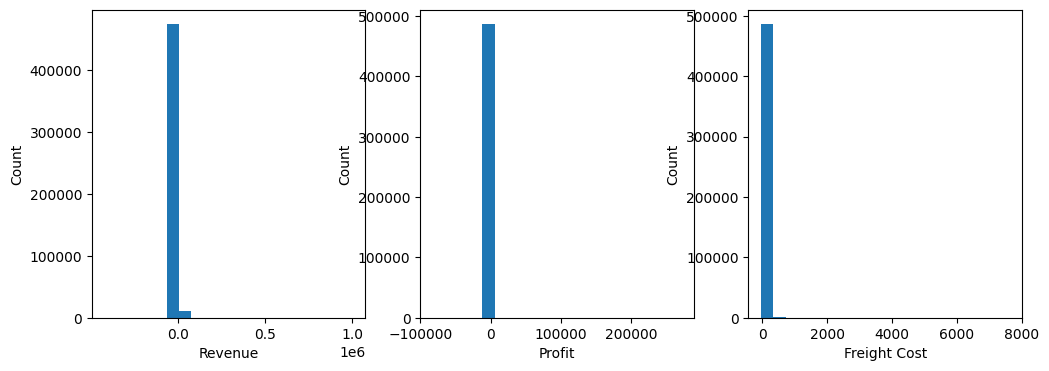

In [ ]:
# creatinng histograms for each variable
fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].hist(df['Revenue'], bins=20)
axs[0].set_xlabel('Revenue')
axs[0].set_ylabel('Count')
axs[1].hist(df['Profit'], bins=20)
axs[1].set_xlabel('Profit')
axs[1].set_ylabel('Count')
axs[2].hist(df['Freight cost'], bins=20)
axs[2].set_xlabel('Freight Cost')
axs[2].set_ylabel('Count')
plt.show()

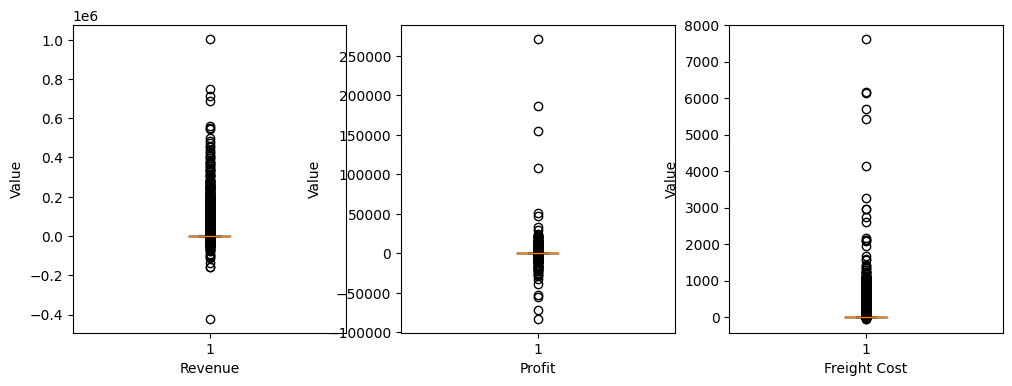

In [ ]:
# creating box plots for each variable
fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].boxplot(df['Revenue'])
axs[0].set_xlabel('Revenue')
axs[0].set_ylabel('Value')
axs[1].boxplot(df['Profit'])
axs[1].set_xlabel('Profit')
axs[1].set_ylabel('Value')
axs[2].boxplot(df['Freight cost'])
axs[2].set_xlabel('Freight Cost')
axs[2].set_ylabel('Value')
plt.show()

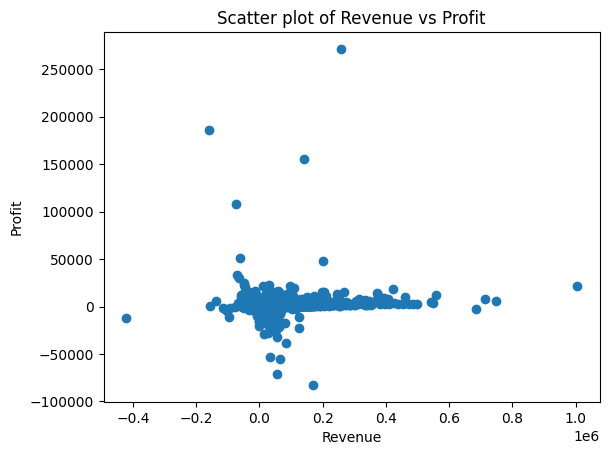

In [ ]:
plt.scatter(df['Revenue'], df['Profit'])
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.title('Scatter plot of Revenue vs Profit')
plt.show()

In [ ]:
df.head()

,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName,GrossMargin,month_year,MonthYear,Year
0,100002803,2913843.0,10,2021-02-04,2,Microsoft,Operating System Software,1000477.0,254.213783,1.271048,0.0,Components North,252.942734,2021-02,2021-02,2021
1,100003323,2918083.0,50,2021-02-04,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.0,Corporate North,185.502628,2021-02,2021-02,2021
2,100016168,2916878.0,20,2021-02-04,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.0,Corporate North,8.011783,2021-02,2021-02,2021
3,100001590,2470475.0,10,2021-02-04,10,Lenovo,Notebook Computers,1000133.0,21362.979640,133.944138,0.0,Corporate South,21229.035502,2021-02,2021-02,2021
4,100001590,2544987.0,10,2021-02-04,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.0,Corporate South,4316.731105,2021-02,2021-02,2021


In [ ]:
df.drop(columns = ['GrossMargin', 'month_year', 'MonthYear','Year'], inplace=True)

In [ ]:
df.head()

,CustomerId,SalesOrderNumber,SalesOrderLineNumber,ShipDate,Qty,Brand,ProductType,ProductSupplierID,Revenue,Profit,Freight cost,SalesTeamName
0,100002803,2913843.0,10,2021-02-04,2,Microsoft,Operating System Software,1000477.0,254.213783,1.271048,0.0,Components North
1,100003323,2918083.0,50,2021-02-04,1,Microsoft,Utilities Software,1000477.0,191.682001,6.179373,0.0,Corporate North
2,100016168,2916878.0,20,2021-02-04,1,Unknown,IT Support Services,1000465.0,0.000000,-8.011783,0.0,Corporate North
3,100001590,2470475.0,10,2021-02-04,10,Lenovo,Notebook Computers,1000133.0,21362.979640,133.944138,0.0,Corporate South
4,100001590,2544987.0,10,2021-02-04,5,Lenovo,Notebook Computers,1000133.0,4344.370602,27.639497,0.0,Corporate South


In [ ]:
df.to_csv('anon_mod.csv', index=False)